# Forecasting Churn of Customers: Beta Bank

## Introduction
<p>Beta Bank is currently experiencing a slow loss in customers every month. Beta Bank has decided that it's cheaper to try and save their existing customers, rather than trying to attract new customers. In order to predict whether a customer will leave the bank soon, I will analyze provided data on clients' past behavior and termination of contracts with the bank. I will build a model with a maximum possible F1 score. </p>


Dataset Description: each row in the dataset represents an individual customer
<br>Features:
- ID number
- Surname
- Credit Score
- Country of Residence
- Gender
- Age
- Tenure (in years)
- Account Balance
- Number of Banking Products Used
- Has Credit Card? (No:0, Yes:1)
- Active Member? (No:0, Yes:1)
- Estimated Salary
Target:
- Exited? (No:0, Yes:1)

### Stages
My project consists of the following stages:
1. Introduction
2. Data Preprocessing
3. Exploratory Data Analysis
4. Feature Preparation
5. Model Creation
6. Model Evaluation
7. Conclusion

## Data Preprocessing

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.preprocessing import OrdinalEncoder,StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle


In [2]:
# load the file data
df = pd.read_csv('churn.csv')

In [3]:
# general info on df
df.info()
df.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3933,3934,15758013,Napolitano,698,France,Male,37,5.0,98400.61,2,0,0,25017.28,0
5124,5125,15612140,Milano,721,Spain,Female,46,7.0,137933.39,1,1,1,67976.57,0
564,565,15788126,Evans,689,Spain,Female,38,6.0,121021.05,1,1,1,12182.15,0
6982,6983,15685096,Trevisani,753,France,Female,50,4.0,0.00,2,1,1,861.40,0
6892,6893,15705009,Cartwright,649,France,Female,56,8.0,156974.26,1,1,0,89405.26,1
4498,4499,15777759,Boucaut,570,France,Male,30,2.0,131406.56,1,1,1,47952.45,0
1565,1566,15649523,Kennedy,581,France,Male,38,1.0,0.00,2,1,0,46176.22,0
3770,3771,15568953,Alexeieva,477,France,Male,27,NaN,128554.98,1,1,1,133173.19,0
3348,3349,15572291,Kao,825,France,Male,40,6.0,132308.22,1,0,0,117122.50,0
3708,3709,15679983,Garmon,565,France,Male,34,7.0,0.00,1,0,0,74593.84,0


In [4]:
# check for duplicates in df
df.duplicated().sum()

0

In [5]:
# check for implicit duplicates in df
print(df['CustomerId'].duplicated().sum())
print(df['Surname'].duplicated().sum())

0
7068


In [6]:
# check missing values in df
print(df.isna().sum())
print(df.isna().sum()/len(df))

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64
RowNumber          0.0000
CustomerId         0.0000
Surname            0.0000
CreditScore        0.0000
Geography          0.0000
Gender             0.0000
Age                0.0000
Tenure             0.0909
Balance            0.0000
NumOfProducts      0.0000
HasCrCard          0.0000
IsActiveMember     0.0000
EstimatedSalary    0.0000
Exited             0.0000
dtype: float64


No duplicates in the dataset. There are missing values in the Tenure column but it is less than 10% and there is no accurate way for me to fill these values, so I will just drop these rows. If I chose to fill these values, it could negatively impact the training of the Classifier Model.  

In [7]:
# drop rows with missing values
df.dropna(axis='rows',inplace=True)
# check changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9091 entries, 0 to 9998
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        9091 non-null   int64  
 1   CustomerId       9091 non-null   int64  
 2   Surname          9091 non-null   object 
 3   CreditScore      9091 non-null   int64  
 4   Geography        9091 non-null   object 
 5   Gender           9091 non-null   object 
 6   Age              9091 non-null   int64  
 7   Tenure           9091 non-null   float64
 8   Balance          9091 non-null   float64
 9   NumOfProducts    9091 non-null   int64  
 10  HasCrCard        9091 non-null   int64  
 11  IsActiveMember   9091 non-null   int64  
 12  EstimatedSalary  9091 non-null   float64
 13  Exited           9091 non-null   int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.0+ MB


In [8]:
# investigate unique values for Geography and Gender columns
print(df.Gender.unique())
print(df.Geography.unique())

['Female' 'Male']
['France' 'Spain' 'Germany']


The RowNumber, CustoomerId & Surname are all identifiers for the bank customer and therefore can be removed. 

In [9]:
# remove unnecessary columns
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)
# check changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9091 entries, 0 to 9998
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      9091 non-null   int64  
 1   Geography        9091 non-null   object 
 2   Gender           9091 non-null   object 
 3   Age              9091 non-null   int64  
 4   Tenure           9091 non-null   float64
 5   Balance          9091 non-null   float64
 6   NumOfProducts    9091 non-null   int64  
 7   HasCrCard        9091 non-null   int64  
 8   IsActiveMember   9091 non-null   int64  
 9   EstimatedSalary  9091 non-null   float64
 10  Exited           9091 non-null   int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 852.3+ KB


In [10]:
# check descriptive stats df
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000
mean,650.736553,38.949181,4.997690,76522.740015,1.530195,0.704983,0.515565,100181.214924,0.203938
std,96.410471,10.555581,2.894723,62329.528576,0.581003,0.456076,0.499785,57624.755647,0.402946
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,2.000000,0.000000,1.000000,0.000000,0.000000,51227.745000,0.000000
50%,652.000000,37.000000,5.000000,97318.250000,1.000000,1.000000,1.000000,100240.200000,0.000000
75%,717.000000,44.000000,7.000000,127561.890000,2.000000,1.000000,1.000000,149567.210000,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


All of the descriptive stats make sense and I will investigate the data distributions further.

## Exploratory Data Exploration

array([[<Axes: title={'center': 'CreditScore'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Tenure'}>],
       [<Axes: title={'center': 'Balance'}>,
        <Axes: title={'center': 'NumOfProducts'}>,
        <Axes: title={'center': 'HasCrCard'}>],
       [<Axes: title={'center': 'IsActiveMember'}>,
        <Axes: title={'center': 'EstimatedSalary'}>,
        <Axes: title={'center': 'Exited'}>]], dtype=object)

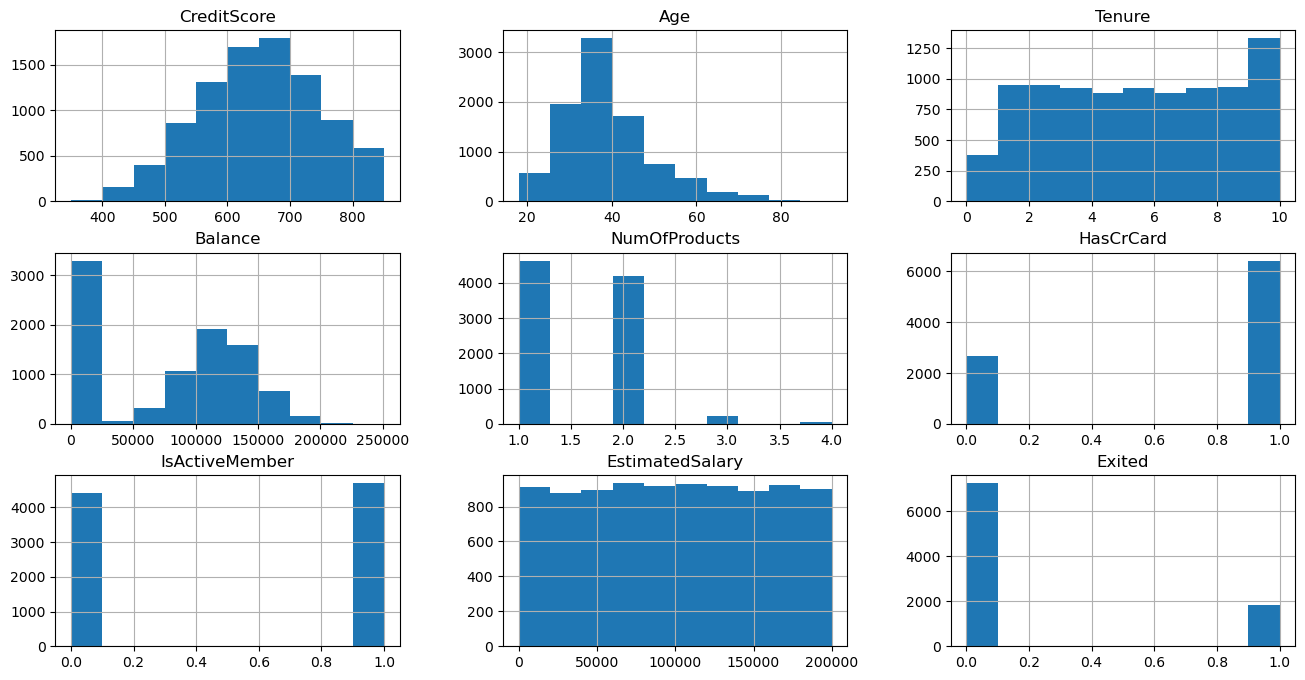

In [11]:
# histograms of numeric column values
df.hist(figsize=(16,8))

<Axes: xlabel='count', ylabel='Gender'>

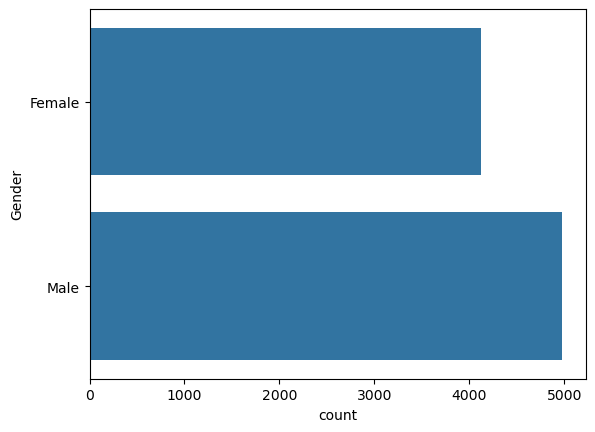

In [12]:
# count plot of Gender
sns.countplot(y='Gender',data=df)

<Axes: xlabel='count', ylabel='Geography'>

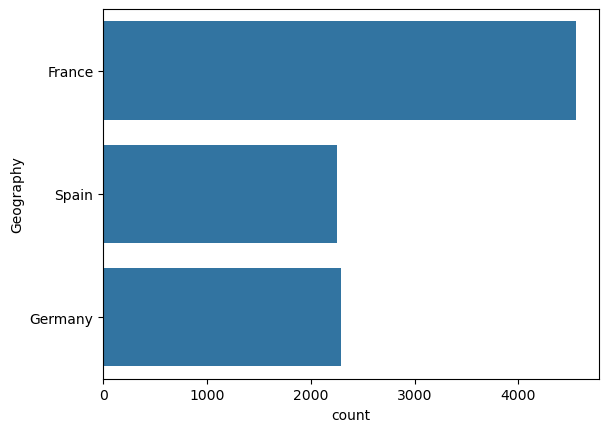

In [13]:
# count plot of Geography
sns.countplot(y='Geography',data=df)

<Axes: xlabel='count', ylabel='Exited'>

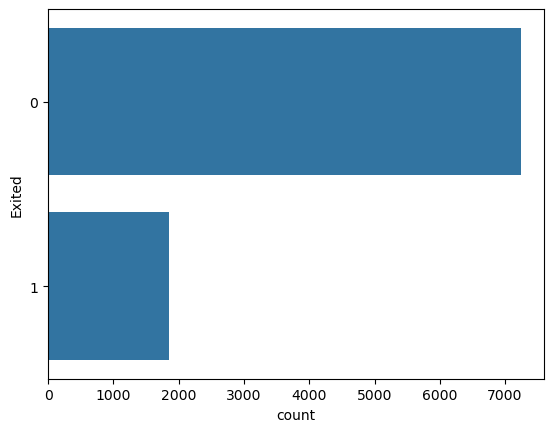

In [14]:
# count plot of Exited
sns.countplot(y='Exited',data=df)

All of the distributions for the numeric columns make sense. We can also see that there is an imbalance in our target class column. We can also see that there the Gender column is pretty evenly distributed between Male and Female customers. The Geography column shows there are about twice as many customers from France than from Spain & Germany. There is quite an imbalance between the 2 target classes, I will need to address this prior to model training. 

## Feature Preparation

### Encoding the data
I will need to use one hot encoding to convert my categorical columns into numeric variables. I do not want to use label encoding as that will add a ranking between the values. 


In [15]:
# perform ohe on dataset
df_ohe = pd.get_dummies(df,drop_first=True)

In [16]:
# check final df
df_ohe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9091 entries, 0 to 9998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        9091 non-null   int64  
 1   Age                9091 non-null   int64  
 2   Tenure             9091 non-null   float64
 3   Balance            9091 non-null   float64
 4   NumOfProducts      9091 non-null   int64  
 5   HasCrCard          9091 non-null   int64  
 6   IsActiveMember     9091 non-null   int64  
 7   EstimatedSalary    9091 non-null   float64
 8   Exited             9091 non-null   int64  
 9   Geography_Germany  9091 non-null   bool   
 10  Geography_Spain    9091 non-null   bool   
 11  Gender_Male        9091 non-null   bool   
dtypes: bool(3), float64(3), int64(6)
memory usage: 736.9 KB


### Splitting the Data

In [17]:
# define the features and target from the dataset
features_ohe = df_ohe.drop('Exited',axis=1)
target_ohe = df_ohe.Exited
features = df.drop('Exited',axis=1)
target = df.Exited

In [18]:
# split the data into training, validation & testing sets
X_train_ohe,X_valid_ohe,y_train_ohe,y_valid_ohe = train_test_split(
    features_ohe,target_ohe,test_size=0.3,random_state=54321)
X_valid_ohe,X_test_ohe,y_valid_ohe,y_test_ohe = train_test_split(
    X_valid_ohe,y_valid_ohe,test_size=0.5,random_state=54321)
X_train,X_valid,y_train,y_valid = train_test_split(
    features,target,test_size=0.3,random_state=54321)
X_valid,X_test,y_valid,y_test = train_test_split(
    X_valid,y_valid,test_size=0.5,random_state=54321)

In [19]:
# check datasets
print(features_ohe.shape)
print(X_train_ohe.shape)
print(X_valid_ohe.shape)
print(X_test_ohe.shape)

(9091, 11)
(6363, 11)
(1364, 11)
(1364, 11)


### Feature Scaling

In [20]:
# load StandardScaler
scaler = StandardScaler()

In [21]:
# separate out numeric columns to be standardized
numeric = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']

In [22]:
# train scaler and transform features datasets
X_train[numeric] = scaler.fit_transform(X_train[numeric])
X_valid[numeric] = scaler.transform(X_valid[numeric])
X_test[numeric] = scaler.transform(X_test[numeric])
# check changes
print(X_train[numeric].head())

      CreditScore       Age    Tenure   Balance  NumOfProducts  \
1956    -0.902466  1.535940 -0.338923  0.676621       0.813105   
7665    -1.161994 -0.182087 -1.724891  0.709144      -0.920737   
9943     1.370992 -1.518330 -1.031907 -1.233964      -0.920737   
2383     0.467838  0.295143  1.393537  0.900737       0.813105   
2641    -1.182756 -1.041100  0.354061  1.409347      -0.920737   

      EstimatedSalary  
1956         0.486065  
7665        -1.251510  
9943        -1.624023  
2383         1.295862  
2641        -1.644010  


In [23]:
# train scaler and transform features datasets
X_train_ohe[numeric] = scaler.fit_transform(X_train_ohe[numeric])
X_valid_ohe[numeric] = scaler.transform(X_valid_ohe[numeric])
X_test_ohe[numeric] = scaler.transform(X_test_ohe[numeric])
# check changes
print(X_train_ohe[numeric].head())

      CreditScore       Age    Tenure   Balance  NumOfProducts  \
1956    -0.902466  1.535940 -0.338923  0.676621       0.813105   
7665    -1.161994 -0.182087 -1.724891  0.709144      -0.920737   
9943     1.370992 -1.518330 -1.031907 -1.233964      -0.920737   
2383     0.467838  0.295143  1.393537  0.900737       0.813105   
2641    -1.182756 -1.041100  0.354061  1.409347      -0.920737   

      EstimatedSalary  
1956         0.486065  
7665        -1.251510  
9943        -1.624023  
2383         1.295862  
2641        -1.644010  


### Examing the class balance


In [24]:
# see how many occurences of each target class are in the training dataset
print('zeros: ',len(y_train[y_train==0]))
print('ones: ',len(y_train[y_train==1]))

zeros:  5075
ones:  1288


In [25]:
# split the training dataset
X_zeros_index = X_train[y_train==0].index
X_ones_index = X_train[y_train==1].index
y_zeros_index = y_train[y_train==0].index
y_ones_index = y_train[y_train==1].index

In [26]:
# duplicate the postive observations & create upsampled training dataset
repeat = 4
X_upsampled = pd.concat([X_train.loc[X_zeros_index]]+[X_train.loc[X_ones_index]]*repeat)
y_upsampled = pd.concat([y_train.loc[X_zeros_index]]+[y_train.loc[X_ones_index]]*repeat)

In [27]:
# duplicate the positive observations & create a new training data set
X_upsampled_ohe = pd.concat([X_train_ohe.loc[X_zeros_index]]+[X_train_ohe.loc[X_ones_index]]*repeat)
y_upsampled_ohe = pd.concat([y_train_ohe.loc[y_zeros_index]]+[y_train_ohe.loc[y_ones_index]]*repeat)

In [28]:
# shuffle the data
X_upsampled,y_upsampled = shuffle(X_upsampled,y_upsampled,random_state=54321)
X_upsampled_ohe,y_upsampled_ohe = shuffle(X_upsampled_ohe,y_upsampled_ohe,random_state=54321)

In [29]:
print(X_upsampled.shape,y_upsampled.shape)
print(X_upsampled_ohe.shape,y_upsampled_ohe.shape)

(10227, 10) (10227,)
(10227, 11) (10227,)


## Model Creation

In [30]:
import sklearn.metrics as metrics

def evaluate_model(model, train_features, train_target, test_features, test_target):
    
    eval_stats = {}
    
    fig, axs = plt.subplots(1, 3, figsize=(20, 6)) 
    
    for type, features, target in (('train', train_features, train_target), ('test', test_features, test_target)):
        
        eval_stats[type] = {}
    
        pred_target = model.predict(features)
        pred_proba = model.predict_proba(features)[:, 1]
        
        # F1
        f1_thresholds = np.arange(0, 1.01, 0.05)
        f1_scores = [metrics.f1_score(target, pred_proba>=threshold) for threshold in f1_thresholds]
        
        # ROC
        fpr, tpr, roc_thresholds = metrics.roc_curve(target, pred_proba)
        roc_auc = metrics.roc_auc_score(target, pred_proba)    
        eval_stats[type]['ROC AUC'] = roc_auc

        # PRC
        precision, recall, pr_thresholds = metrics.precision_recall_curve(target, pred_proba)
        aps = metrics.average_precision_score(target, pred_proba)
        eval_stats[type]['APS'] = aps
        
        if type == 'train':
            color = 'blue'
        else:
            color = 'green'

        # F1 Score
        ax = axs[0]
        max_f1_score_idx = np.argmax(f1_scores)
        ax.plot(f1_thresholds, f1_scores, color=color, label=f'{type}, max={f1_scores[max_f1_score_idx]:.2f} @ {f1_thresholds[max_f1_score_idx]:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(f1_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(f1_thresholds[closest_value_idx], f1_scores[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('threshold')
        ax.set_ylabel('F1')
        ax.legend(loc='lower center')
        ax.set_title(f'F1 Score') 

        # ROC
        ax = axs[1]    
        ax.plot(fpr, tpr, color=color, label=f'{type}, ROC AUC={roc_auc:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(roc_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'            
            ax.plot(fpr[closest_value_idx], tpr[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('FPR')
        ax.set_ylabel('TPR')
        ax.legend(loc='lower center')        
        ax.set_title(f'ROC Curve')
        
        # PRC
        ax = axs[2]
        ax.plot(recall, precision, color=color, label=f'{type}, AP={aps:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(pr_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(recall[closest_value_idx], precision[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('recall')
        ax.set_ylabel('precision')
        ax.legend(loc='lower center')
        ax.set_title(f'PRC')        

        eval_stats[type]['Accuracy'] = metrics.accuracy_score(target, pred_target)
        eval_stats[type]['F1'] = metrics.f1_score(target, pred_target)
    
    df_eval_stats = pd.DataFrame(eval_stats)
    df_eval_stats = df_eval_stats.round(2)
    df_eval_stats = df_eval_stats.reindex(index=('Accuracy', 'F1', 'APS', 'ROC AUC'))
    
    print(df_eval_stats)
    
    return

### Logistic Regression Model
I will train a Logistic Regression first and will evaluate it's performance in order to then make improvements on the F1 score. 

In [31]:
# create Logistic Regression model
model_1 = LogisticRegression(solver='liblinear',random_state=54321)

          train  test
Accuracy   0.81  0.81
F1         0.33  0.31
APS        0.48  0.45
ROC AUC    0.78  0.74


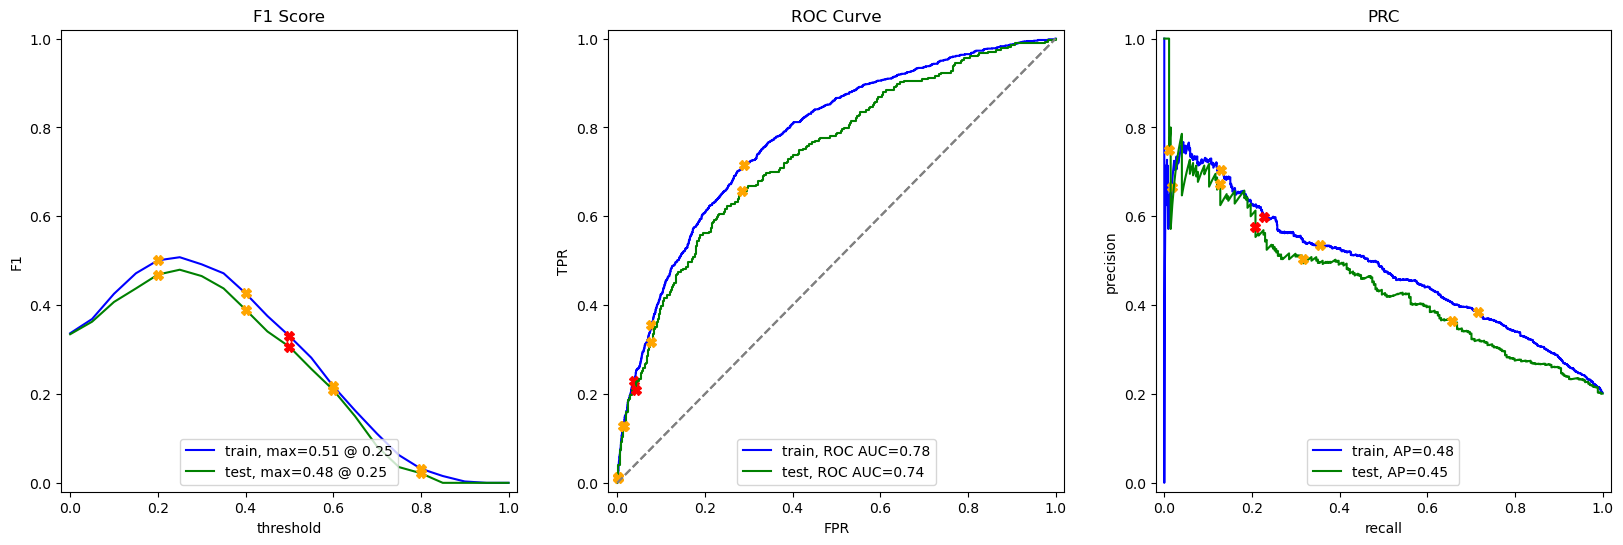

In [32]:
# train model & predict validation dataset without upsampling
model_1.fit(X_train_ohe,y_train_ohe)
evaluate_model(model_1,X_train_ohe,y_train_ohe,X_valid_ohe,y_valid_ohe)


          train  test
Accuracy   0.72  0.71
F1         0.72  0.48
APS        0.76  0.43
ROC AUC    0.78  0.74


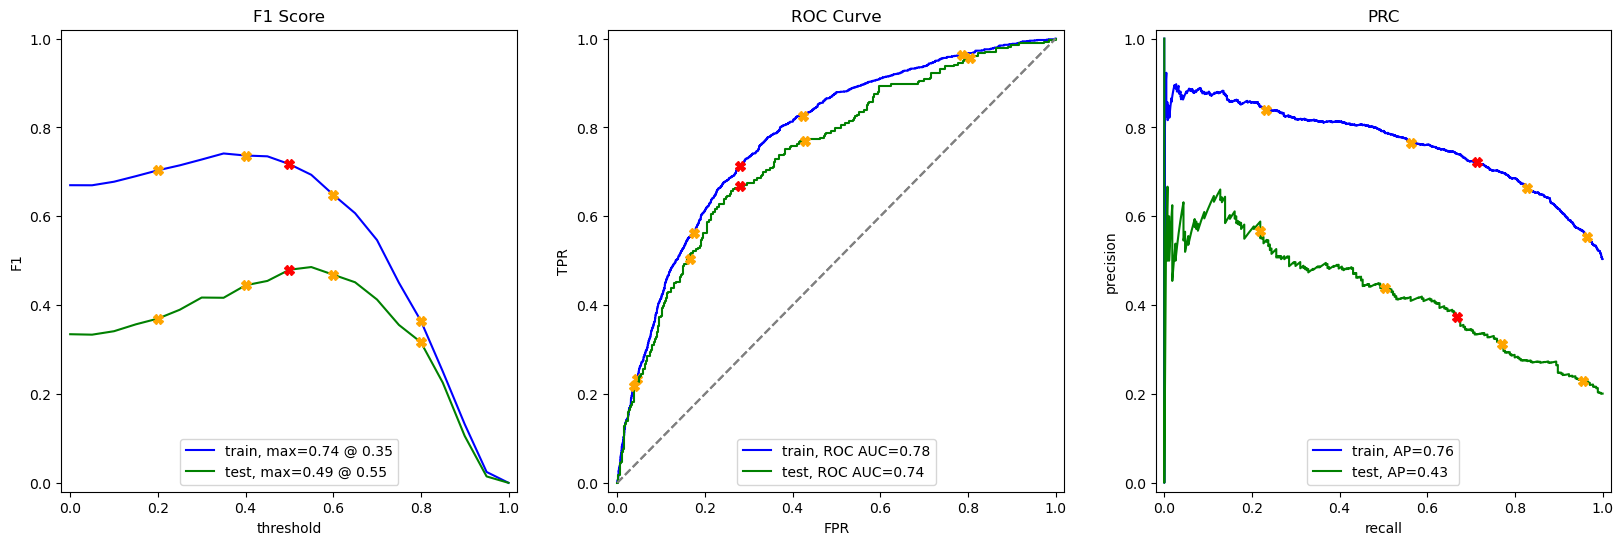

In [33]:
# train model & predict validation dataset without upsampling
model_2 = LogisticRegression(solver='liblinear',random_state=12345)
model_2.fit(X_upsampled_ohe,y_upsampled_ohe)
evaluate_model(model_2,X_upsampled_ohe,y_upsampled_ohe,X_valid_ohe,y_valid_ohe)

### Random Forest Classifier Model

In [34]:
# set GridSearchCV hyperparameter
params = {'n_estimators':[10,50,100]}

          train  test
Accuracy   0.79  0.80
F1         0.78  0.58
APS        0.88  0.65
ROC AUC    0.87  0.85


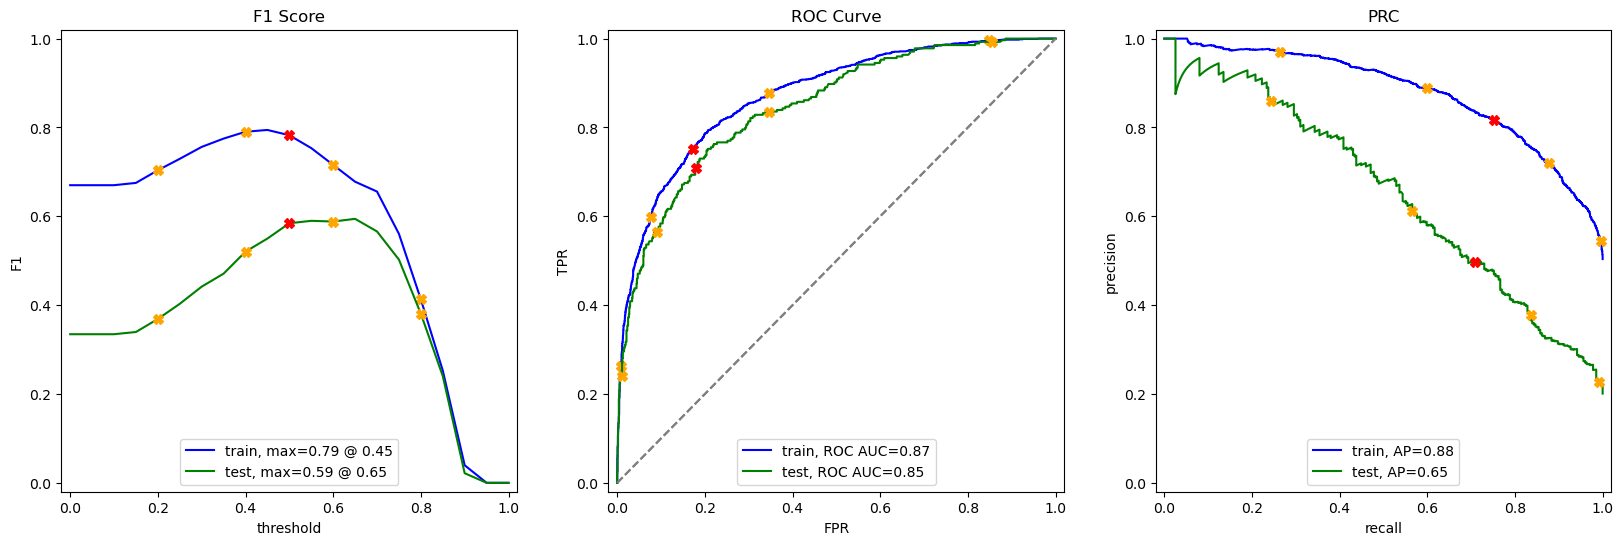

In [35]:
# create random forest regressor model
model_3 = RandomForestClassifier(random_state=12345,max_depth=5,n_estimators=20)
model_3.fit(X_upsampled_ohe,y_upsampled_ohe)
evaluate_model(model_3,X_upsampled_ohe,y_upsampled_ohe,X_valid_ohe,y_valid_ohe)

In [36]:
# use gridsearchcv to find the best parameters for the random forest classifier
model_4 = GridSearchCV(estimator=model_3,param_grid=params,cv=5,verbose=3)
model_4.fit(X_upsampled_ohe,y_upsampled_ohe)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END ...................n_estimators=10;, score=0.787 total time=   0.1s
[CV 2/5] END ...................n_estimators=10;, score=0.785 total time=   0.1s
[CV 3/5] END ...................n_estimators=10;, score=0.771 total time=   0.1s
[CV 4/5] END ...................n_estimators=10;, score=0.788 total time=   0.1s
[CV 5/5] END ...................n_estimators=10;, score=0.768 total time=   0.1s
[CV 1/5] END ...................n_estimators=50;, score=0.785 total time=   0.2s
[CV 2/5] END ...................n_estimators=50;, score=0.783 total time=   0.2s
[CV 3/5] END ...................n_estimators=50;, score=0.768 total time=   0.2s
[CV 4/5] END ...................n_estimators=50;, score=0.786 total time=   0.2s
[CV 5/5] END ...................n_estimators=50;, score=0.773 total time=   0.2s
[CV 1/5] END ..................n_estimators=100;, score=0.788 total time=   0.5s
[CV 2/5] END ..................n_estimators=100;,

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=5, n_estimators=20,
                                              random_state=12345),
             param_grid={'n_estimators': [10, 50, 100]}, verbose=3)

          train  test
Accuracy   0.79  0.79
F1         0.78  0.58
APS        0.88  0.65
ROC AUC    0.87  0.84


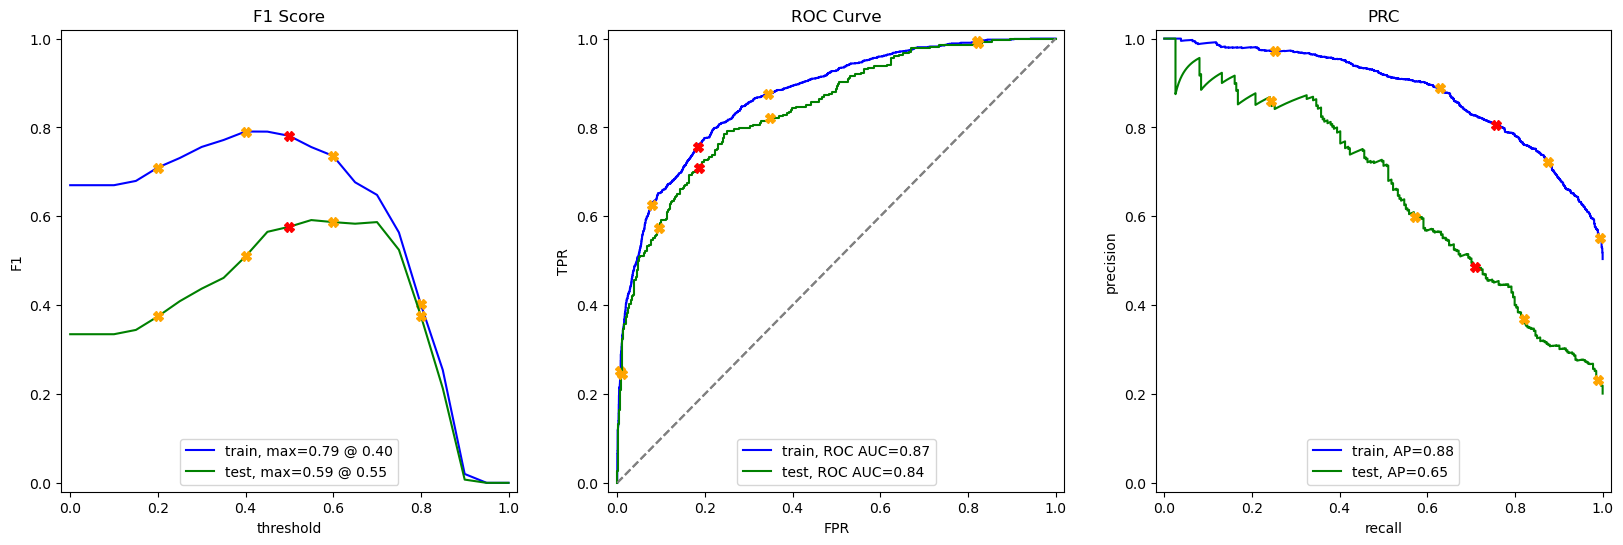

In [37]:
evaluate_model(model_4,X_upsampled_ohe,y_upsampled_ohe,X_valid_ohe,y_valid_ohe)

### CatBoost Classifier

In [38]:
catfeatures = ['Geography','Gender']

In [39]:
model_5 = CatBoostClassifier(iterations=200,verbose=25,cat_features=catfeatures)
model_5.fit(X_upsampled,y_upsampled,eval_set=(X_valid,y_valid))

Learning rate set to 0.113336
0:	learn: 0.6404223	test: 0.6470834	best: 0.6470834 (0)	total: 69.6ms	remaining: 13.9s
25:	learn: 0.4257838	test: 0.4479971	best: 0.4479971 (25)	total: 257ms	remaining: 1.72s
50:	learn: 0.3938503	test: 0.4360341	best: 0.4360341 (50)	total: 430ms	remaining: 1.26s
75:	learn: 0.3738810	test: 0.4318269	best: 0.4314113 (74)	total: 603ms	remaining: 984ms
100:	learn: 0.3496967	test: 0.4281894	best: 0.4280719 (99)	total: 780ms	remaining: 765ms
125:	learn: 0.3276440	test: 0.4249953	best: 0.4249953 (125)	total: 957ms	remaining: 562ms
150:	learn: 0.3064786	test: 0.4224171	best: 0.4223596 (147)	total: 1.16s	remaining: 377ms
175:	learn: 0.2900860	test: 0.4214379	best: 0.4211767 (172)	total: 1.35s	remaining: 185ms
199:	learn: 0.2742062	test: 0.4177797	best: 0.4176067 (198)	total: 1.54s	remaining: 0us

bestTest = 0.4176067187
bestIteration = 198

Shrink model to first 199 iterations.


          train  test
Accuracy   0.90  0.81
F1         0.90  0.60
APS        0.96  0.69
ROC AUC    0.97  0.84


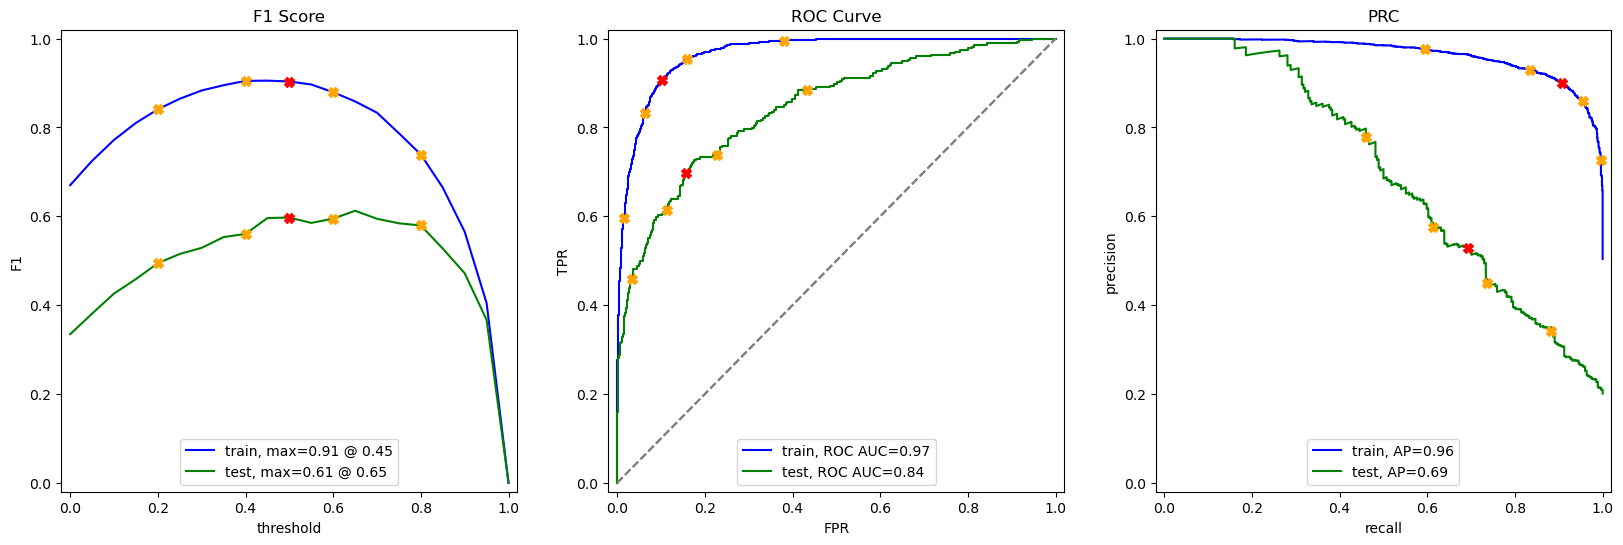

In [40]:
evaluate_model(model_5,X_upsampled,y_upsampled,X_valid,y_valid)

### KNeighbors Classifier Model

In [41]:
model_6 = KNeighborsClassifier()
model_6.fit(X_upsampled_ohe,y_upsampled_ohe)

KNeighborsClassifier()

          train  test
Accuracy   0.89  0.72
F1         0.90  0.50
APS        0.95  0.45
ROC AUC    0.97  0.76


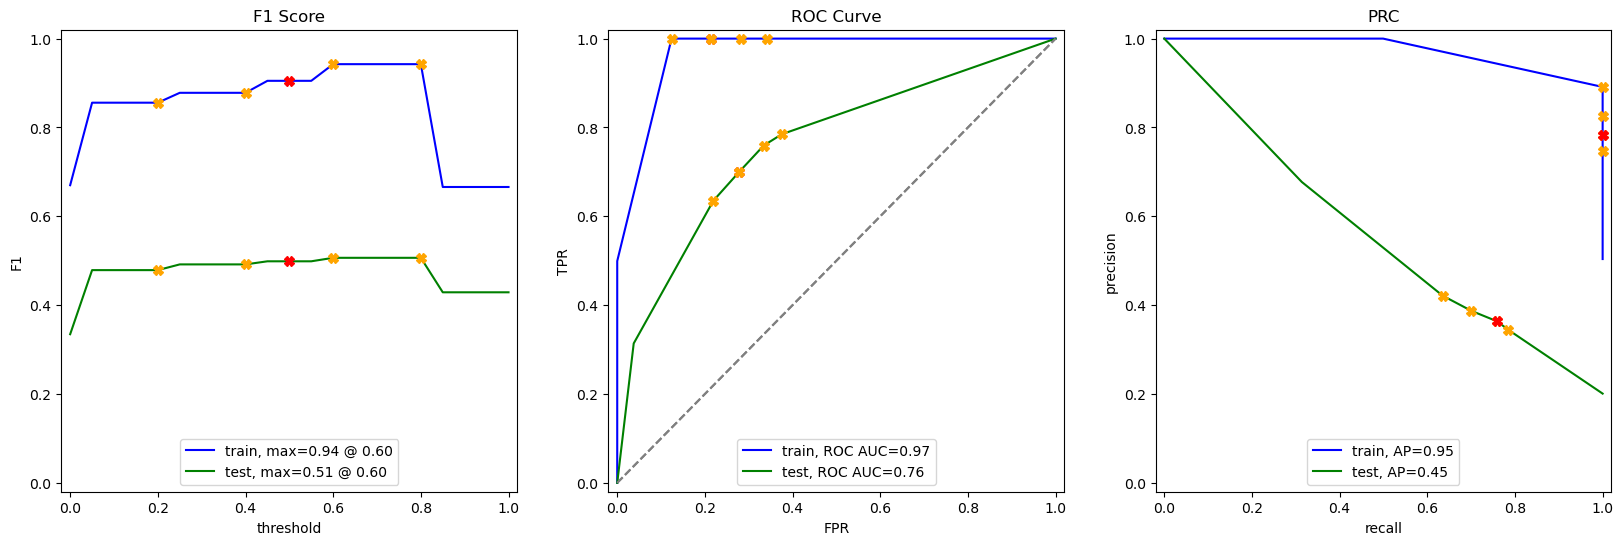

In [42]:
evaluate_model(model_6,X_upsampled_ohe,y_upsampled_ohe,X_valid_ohe,y_valid_ohe)

## Test Final Model

          train  test
Accuracy   0.90  0.81
F1         0.90  0.62
APS        0.96  0.69
ROC AUC    0.97  0.85


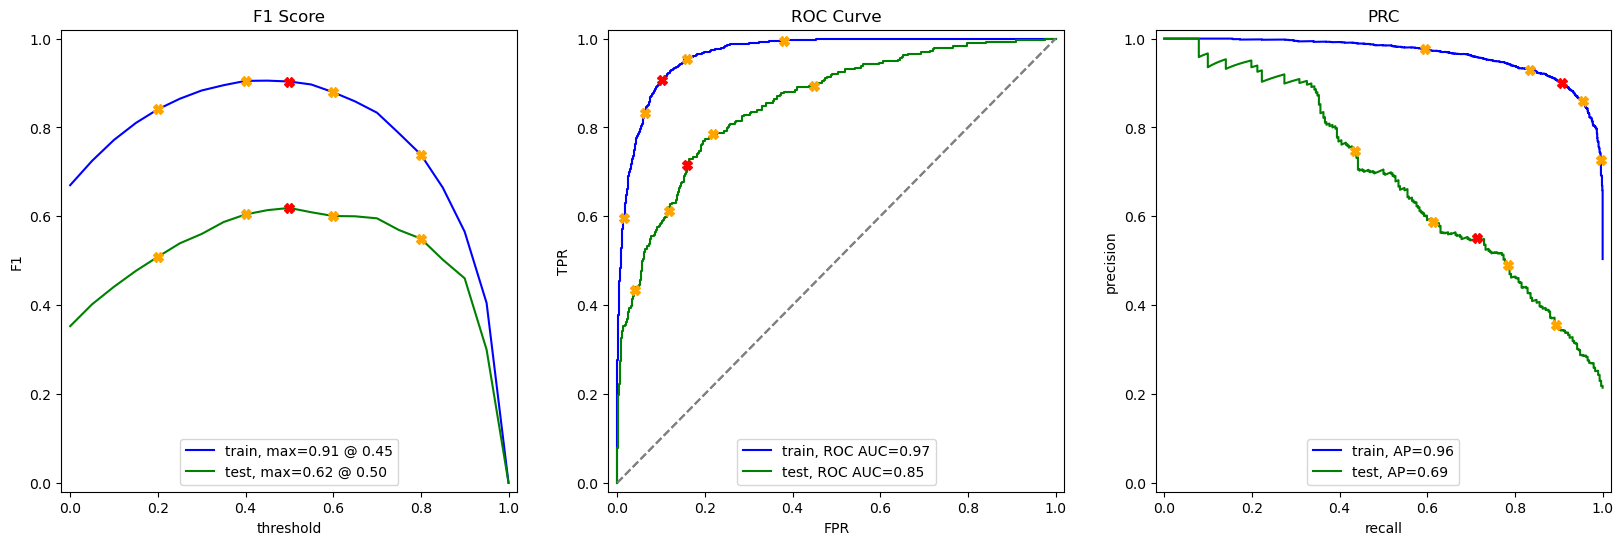

In [43]:
evaluate_model(model_5,X_upsampled,y_upsampled,X_test,y_test)

## Conclusion

<p> The best model with the highest F1 score was the CatBoost Classifier model. There was a class imbalance in the provided dataset, which I addressed by upsampling the minority class.</p>
<p> The accuracy of the final model is 81%. While the accuracy is lower than for some of the other models, the F1 score is significantly higher at 0.61. This means that the model can effectively identify customers who will leave the bank while minimizing false positives and false negatives, giving the bank a better list of customers to try to retain their business. </p>
<p> The ROC Area Under Curve score of 0.85 demonstrates that the model distinguishes whether a customer will leave the bank soon very well. </p>